# Исследование о продаже компьютерных игр

- Ситуация: Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


- Цель: Опрелить оптимальные направления расходования рекламного бюджета.


- Входные данные: таблица с указанием колличества продаж игр по платформам, года, жанрам и рынкам, а также указанием потребительского рейтина, оценки критиков и рейтинга ESRB


- План исследования: в процессе иследования рассматрим зависимости колличества продажи игр относительно платформы, жанра, года и рейтинговой оценки. Выявим лидеров и расмотрим их динамику и долю на кажном из рынков.


## Шаг 1. Откройте файл с данными

### Изучение общей информации о полученных данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')

except:
    data = pd.read_csv('/Users/tumur/Downloads/games.csv')
    
# Рассмотрим общую информацию о таблице - колличество столбцов, их тип,колличество пропусков
data.info()

# Выведем заголовок таблицы и получим больше информации о структуре данных в столбцах
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Комментарий ревьюера
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Выведем информацию о структуре данных, максимальных, минимальных значениях в столбцах
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


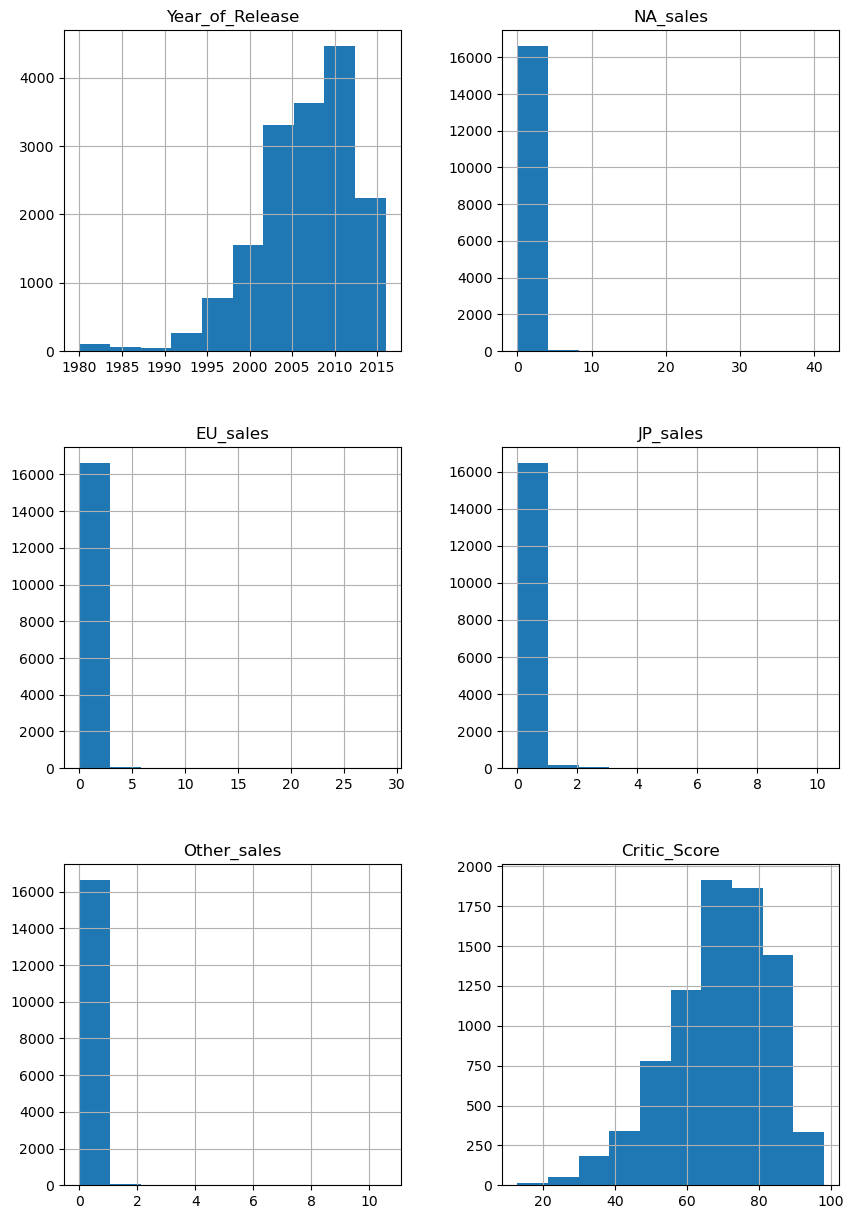

In [5]:
# Созданим визуализую числовых столбцов,чтобы иметь представление о разбросе данных
data.hist(figsize=(10, 15))
None

In [6]:
# Проверка колличества явных дубликатов

data.duplicated().sum()

0

### Вывод Глава 1

Загрузив данные и ознакомившись с ними, обращаем внимание на значительную долю пропусков в столбцах оценки критиков, пользователей, также значительная доля пропусков в столбце с рейтинговыми показателями. 

Дальнейший анализ данных возможен только при условии значительно преобработке данных:заполнение-удаление пустых ячеек, категоризации данных, изменение формата и т.д.

## Шаг 2. Подготовка данных

### Изменение названия столбцов

In [7]:
# приведем название стобцов к нижнему регистру
data.columns = map(str.lower, data.columns)

In [8]:
# Проверим отображение введенных изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

In [9]:
# Определим общее число строк в таблице до удаления аномальных/ пропущенных значений
print ("Число строк таблицы до удаления пропусков и аномальных значений:",len(data))

# Удалим строки с пропусками с стобце "name"
data = data.dropna(subset = ['name',])

# Удалим строки с пропусками в показателе года выпуска игры
data = data.dropna(subset = ['year_of_release',])

# Удалим строки с пропусками в жанре игры 
data = data.dropna(subset = ['genre',])

print ("Число строк таблицы после удаления пропусков и аномальных значений:",len(data))

Число строк таблицы до удаления пропусков и аномальных значений: 16715
Число строк таблицы после удаления пропусков и аномальных значений: 16444


В результате удаления пропусков таблица уменьшилась на 217 строк (менее 2%).
Восполнить пропуски в удаленные строка не представлялось возможным.
Год из названия игры "доставать" не релевантно строк мало, веротяность неточностей и ошибок большая,
при этом есть игры,которовые выходят не в год своего названия (Фифа как пример)

In [10]:
# Выведем уникальные значения столбца оценки критиков, что убедиться, что нет аномальных значений несвойственных данному столбцу
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
# В данном столбце представлено 2376 строк со значением tbd предположительно to be delete,на данном этапе заменим их на NaN
# так как nan -это особое значение с плавающей точкой, представляющее собой «не число».

data['user_score'].unique()

print('Колличество строк со значением tbd в столбце:',len(data[data['user_score']=='tbd']))

data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Колличество строк со значением tbd в столбце: 2376


In [12]:
# Проверяю уникальные занчения столбца после замены значений tbd, что убедиться, что нет других аномалий, и все правильно заменилось
print (data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [13]:
#  в столбце с показателями рейтинга возрастной категории, аномальных значений нет, но при этом существенная доля пропусков.

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В таблице есть игры без определенного рейтинга. Отсутствие рейтинга может быть связано с тем, что игра вышла в продажу раньше,
чем появилась система рейтинга или с тем, что игра соответствует рейтину с общей доступностью, то есть не имеет ограничей по возрасту. 

Для дальнейшего анализа заполним строки с пропуском, условной категорией "NC" - no category.
Если в процессе анализа окажется, что строки с такой категорией будут оказывать значительное влияние на результат, проведем более детальный анализ пропусков в данном столбце.

In [14]:
# Заменим  NaN на NC и проверим уникальные значения после замены

data['rating'] = data['rating'].replace(np.NaN, "NC")

data['rating'].unique()

array(['E', 'NC', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
data.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NC
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NC
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NC
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NC
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NC
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NC
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NC
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NC
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NC


#### Вывод по пропускам и высокой доли nan-значений

Почти половина представленной таблици данных имеет пропуски по различным видам оценки (большая часть из этих строк по всем трем)

Полученные данные неполные и на данном этапе дополнить их качетсвенными (на основе особенностей показателя с пропусками) или математическими методами не представляется возможным.

На данном этапе удалять строки с пропущенной рейтинговой оценкой не стоит, так как возможно они понадобятся для анализа динамики объема продаж по рынка.

Очевидно, что были допущены ошибки при формировании данных, о чем также свидетельствовали показатели "tbd" в 'user_score'

### Изменение типов данных столбцов

In [16]:
# Выведем таблицу, чтобы понимать, какой столбец к какому типу стоит привести
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NC
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NC


In [17]:
# Год выпуска игры -значение дискретное, в данном случае формат целого числа, будет более подходящим
data['year_of_release'] = data['year_of_release'].astype('int')

data['user_score'] = data['user_score'].astype('float')
# Остальные столбцы таблицы уже имеют подходящий формат, или содержат пропуски, 
#что в свою очередь не позволяет изменить их формат


###  Расчет суммарных продаж в регионах

In [18]:
# Созданим столбец с суммарным показателем продаж по всем регионам

data['all_sales'] = data['na_sales']+ data['na_sales']+data['jp_sales']+data['other_sales']

In [19]:
# Проверем результат

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,94.94
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NC,65.74
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,38.44
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,37.45
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NC,33.76


### Вывод Глава 2

 В рамках работы в данном разделе:      
 - были удалены пропуски в столбцах назования игры, года ее выпуска, жандра
 - были обозначены большие доли пропусков в столбцах рейтина ( пользовательского, от кртиков, и возрастной рейтинг
 - в столбце "user_score" значения tbd были заменены на nan, для дальнейшей работы с данными
 - был изменен тип данных в столбце года
 - был добавлен столбец с общей численностью проданных копий
 
Предобработка данных в рамках данного проекта позволила детельней рассмотреть колличество и причины большего числа пропусков, и подготовить данные для дальнейшего анализа

In [20]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Шаг 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [21]:
# Рассчитаем число выпущенных игр по годам
year_count = data.groupby('year_of_release')['name'].count()

print(year_count)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


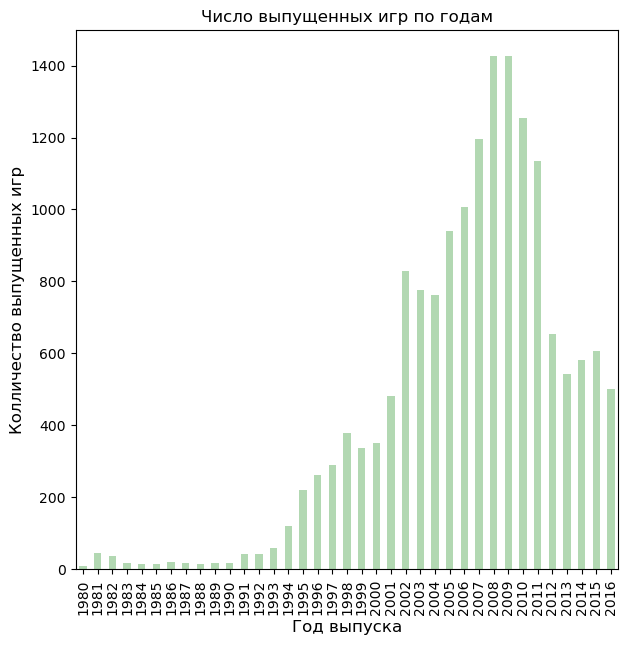

In [22]:
# Построим график выпуска игр по годам для большей наглядности 
year_count.plot( kind = 'bar'
                ,title = 'Число выпущенных игр по годам'
                ,color= 'g',alpha=0.3,figsize=(7, 7)
               )
plt.xlabel('Год выпуска',size=12)
plt.ylabel('Колличество выпущенных игр',size=12)
None


#### Вывов

Отраженная на графике динамика характертиризует почти всю исторю развития компьютерных игр,
Активный рост начался с 1993 и связан он с 2 факторами - развитием технолой и появлением игровых приставок.

Спад количества игр с 2010 года связан с изменением структуры рынка, большей избирательнуюсть покупателей.
Игровых проектов стало меньше, но они начали наращивать свой масштаб.

>Важны ли данные за все периоды? 

Однозначно нет, так как необходимо рассматривать актульные игровые решения,
продукты 2000-2009 года, утратили свою актуальность, а часть платформ для которых создавались игры к 2010 и вовсе исчезла
Релевантно рассматривать данны с 2010 года

### Измение продаж  в зависимости от платформ

In [23]:
# расчитаем число игр созданных для различных платформ

platform_data = data.pivot_table(index = 'platform',values = 'all_sales',aggfunc = 'sum').sort_values(by = 'all_sales',ascending=False).head(10)

print (platform_data)


          all_sales
platform           
PS2         1473.85
X360        1288.66
Wii         1119.73
DS           994.68
PS3          994.26
PS           849.91
GBA          422.41
XB           373.98
NES          355.84
PSP          331.18


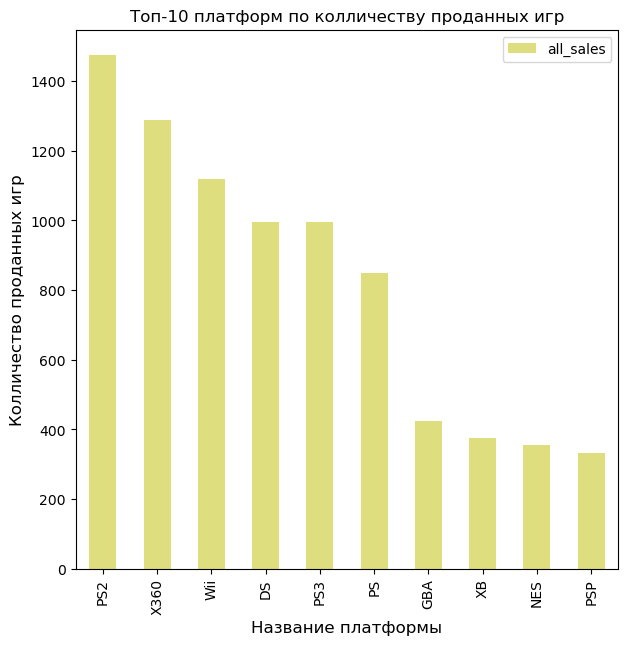

In [24]:
platform_data.plot( kind = 'bar'
                ,title = 'Топ-10 платформ по колличеству проданных игр'
                ,color= 'y',alpha=0.5,figsize=(7, 7)
               )
plt.xlabel('Название платформы',size=12)
plt.ylabel('Колличество проданных игр',size=12)
None

In [25]:
top_platforms = platform_data.index.values

In [26]:
# Создадим выборку в которой будет информация только по топ 10 платформ
new_top = data.query('platform in @top_platforms')
new_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,94.94
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NC,65.74
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,38.44
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,37.45
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,31.94


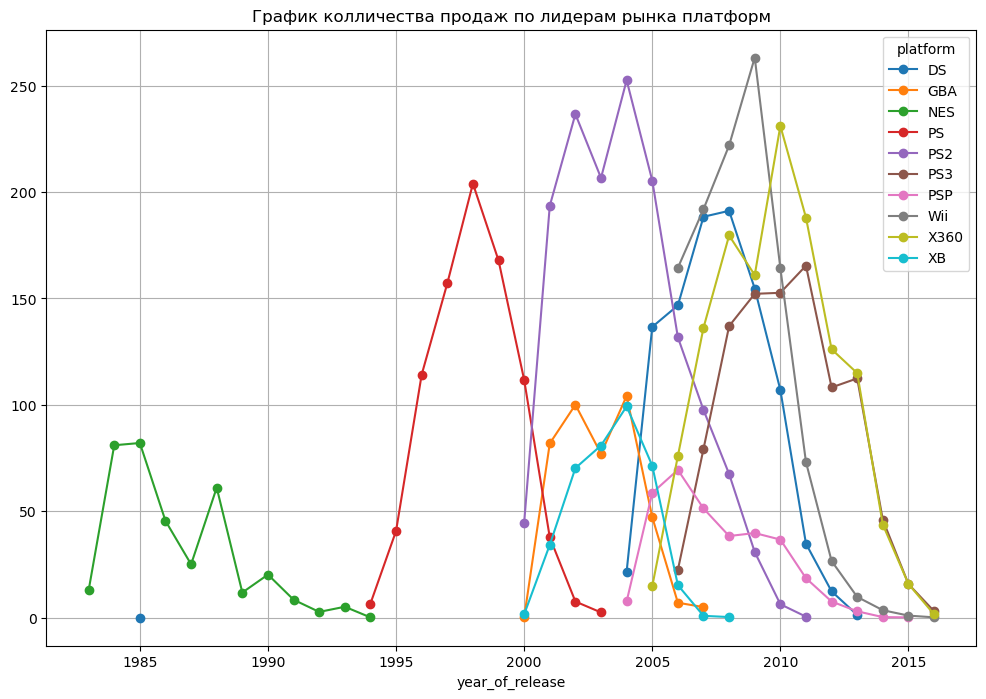

In [27]:
#Построим график динамики продаж игр по каждой из топ 10 платформ

(
new_top
    .pivot_table(index = 'year_of_release',columns = 'platform',values = 'all_sales',aggfunc = 'sum')
    .plot.line(grid=True, marker="o",figsize=(12, 8), title = 'График колличества продаж по лидерам рынка платформ')
)
None


In [28]:
# на приведенном графике есть аномальное значение отраженное синей точкой в 1985. Рассмотрим его подробнее.
new_top[new_top['year_of_release']==1985]

# Колличество продаж игровой платфомы DS составили 0.02 млн. копий, при этом Nintendo DS, была выпущена лишь в 2004 году

# Удалим строку с аномальным значением как из выбор как и из общего набора данных, чтобы в дальнейшем не сталкиваться с ней.
 
data = data.drop(data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)].index)
new_top= new_top.drop(new_top[(new_top['platform'] == 'DS') & (new_top['year_of_release'] == 1985)].index)

# Проверим данные после удаления строки
new_top[new_top['year_of_release']==1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NC,65.74
374,Kung Fu,NES,1985,Action,1.64,0.38,1.42,0.06,NaN,NaN,NC,4.76
869,Soccer,NES,1985,Sports,0.18,0.23,1.53,0.02,NaN,NaN,NC,1.91
1262,Ice Climber,NES,1985,Platform,0.46,0.10,0.92,0.02,NaN,NaN,NC,1.86
1482,Gyromite,NES,1985,Puzzle,0.73,0.16,0.40,0.03,NaN,NaN,NC,1.89
1971,Tag Team Match M.U.S.C.L.E.,NES,1985,Fighting,0.00,0.00,1.05,0.00,NaN,NaN,NC,1.05
2011,Bomberman,NES,1985,Puzzle,0.18,0.00,0.85,0.00,NaN,NaN,NC,1.21
2062,1942,NES,1985,Shooter,0.65,0.14,0.21,0.00,NaN,NaN,NC,1.51
2252,Balloon Fight,NES,1985,Platform,0.39,0.09,0.43,0.01,NaN,NaN,NC,1.22
3904,Wrecking Crew,NES,1985,Platform,0.00,0.00,0.51,0.00,NaN,NaN,NC,0.51


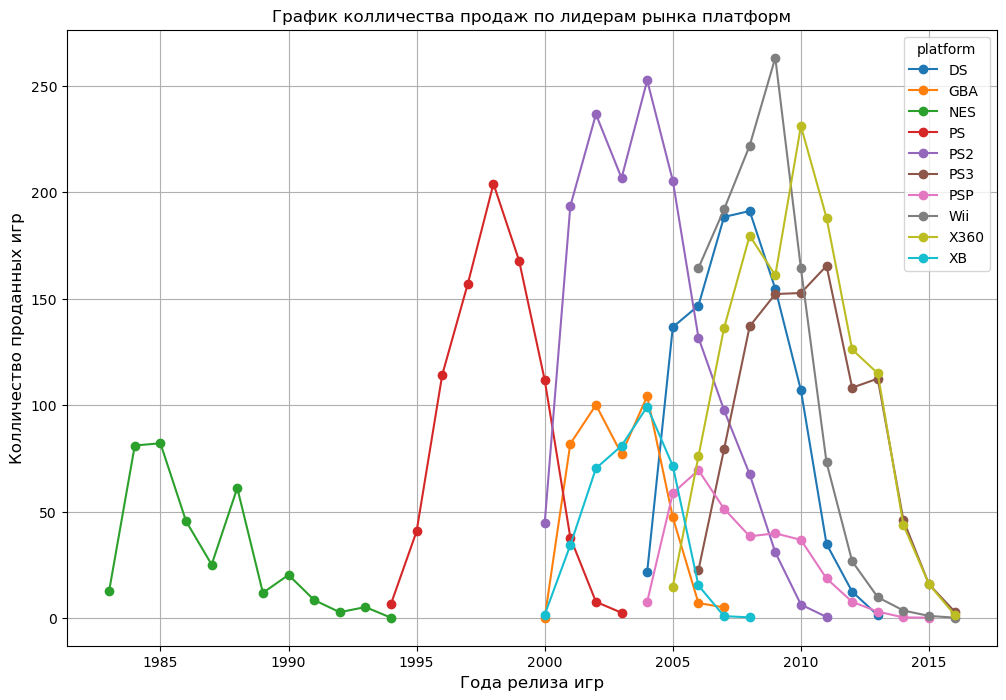

In [29]:
# Построим график заного учитывая удаленную строку

(
new_top
    .pivot_table(index = 'year_of_release',columns = 'platform',values = 'all_sales',aggfunc = 'sum')
    .plot.line(grid=True, marker="o",figsize=(12, 8), title = 'График колличества продаж по лидерам рынка платформ')
)
plt.xlabel('Года релиза игр',size=12)
plt.ylabel('Колличество проданных игр',size=12)
None

Визуализация динамики продаж топ 10 приставок по годам, позволяет заметить, что часть лидеров продаж уже пережила свои пик продаж, и ориентироваться на эти платформы и создавать под них игры - обреченный экономический план. 

К таким относятся NES, PS, PS2, GBA, XB

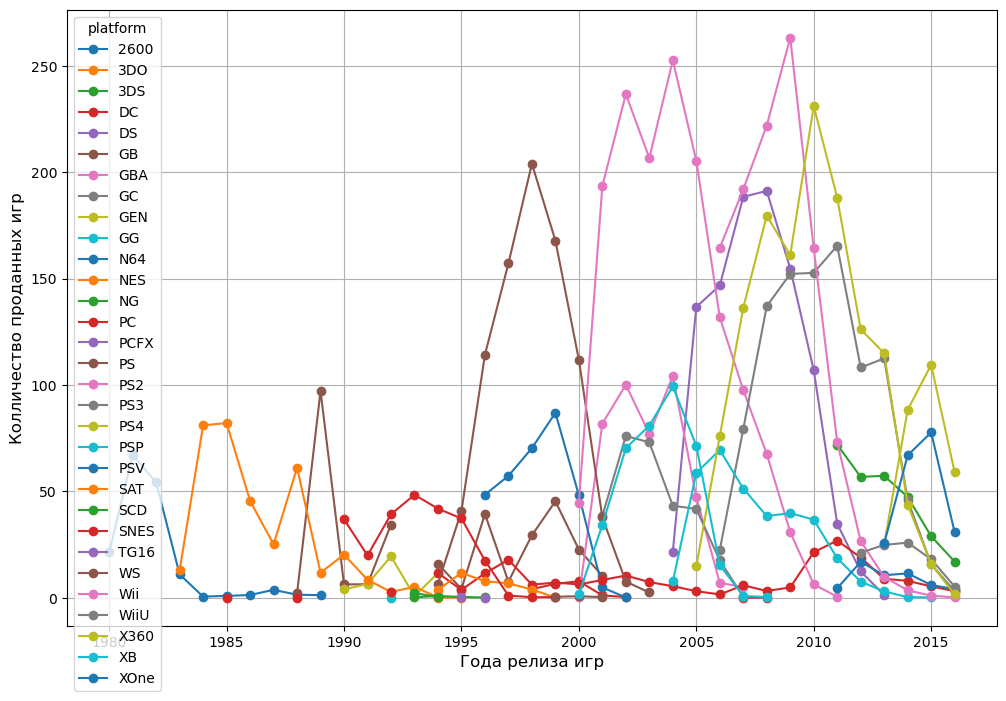

In [30]:
# Построим график динамики объема продаж по всем платформам, что выявить потенциальных лидеров в будущем
(
data
    .pivot_table(index = 'year_of_release',columns = 'platform',values = 'all_sales',aggfunc = 'sum')
    .plot.line(grid=True, marker="o",figsize=(12, 8))
    
)
plt.xlabel('Года релиза игр',size=12)
plt.ylabel('Колличество проданных игр',size=12)
None

#### Вывод 

При анализе всего периода данных с 1980 года в число лидеров среди платформ попали: 'PS2','X360','Wii','DS','PS3','PS','GBA','XB','NES','PSP', но порядка половины наименований из этого списка утратила свою популярность (их объем продаж либо перестал увеличиваться, либо растет незначительно).
Так что ориентироваться на эти данные при составлении рекомендаций - не стоит


>За какой характерный срок появляются новые и исчезают старые платформы?

На длительность данного периода влият ряд факторов (специфика платформы, уровень развития технолий - анализируемый период более  35 лет, популярность платформы и колличесто игр для нее). В среднем платформы "живут" порядка 5 лет, но с приближением к 2016 году, срок "жизни платформ уменьшается", так как техлогий быстрее развиваются и платформы приходтся чаще обновлять,чтобы они сохраняли рыночную конкуренцию

### Определение и обоснование актуального периода анализа данных

In [31]:
x = data.groupby('platform').year_of_release.nunique()
x.describe()

count    31.000000
mean      7.645161
std       5.063256
min       1.000000
25%       4.000000
50%       7.000000
75%      10.500000
max      26.000000
Name: year_of_release, dtype: float64

#### Вывод

Для построения качественного прогноза на 2017 год. необходимо рассматривать данные с 2013, но не раньше, по ряду причин:

- Технологии применяемые до 2013 году, уже устарели, а платформы на их базе не актуальны на сегодняшний день.

- Даже популярные платформы, с периодичностью в 3-4 года обновляются (PS1,PS2,PS3,PS4,PS5), чтобы избежать искажения данных в пользу устаревающих моделей необходимо рассматривать период не более 3-4 лет.

- Семилетний период являтся достаточным для формирования устоичивой тенденции роста или падения популярности платформы, при прочих равных.


### Удаление данных, не вошедных в обоснованный период анализа 

In [32]:
actual_data= data[data['year_of_release'] >= 2013]


In [33]:
# Проверка обновленных данных
actual_data.info()

actual_data['year_of_release'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  all_sales        2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


array([2013, 2015, 2014, 2016])

###  Определение платформ - лидеров продаж

In [34]:
# Сформируем таблицу динамики коллинества игр по платформам 
actual_data.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,91.0,80.0,86.0,46.0
DS,8.0,-,-,-
PC,38.0,47.0,50.0,54.0
PS3,126.0,108.0,73.0,38.0
PS4,16.0,75.0,137.0,164.0
PSP,54.0,10.0,3.0,-
PSV,63.0,100.0,110.0,85.0
Wii,12.0,6.0,4.0,1.0
WiiU,42.0,31.0,28.0,14.0


В таблице приведено число игр - создаваемых на различных платрформах по годам.
Положительные тендеции есть у ряда платформа:
- С 2013 года число игр содаваемых на PC медленно, но непрерывно растет

- PS4 показывает значительный уровень прироста от года к году с момента начала продажи на данную платформу

- ХOne показывает неизменно положительную динамику с 2013

- Для остальных платформ характерно снижение уровня продаж к 2016 году, или полной их прекращение

In [35]:
# сформирует таблицу динами объемов продаж
actual_data.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc='sum', fill_value='-')


year_of_release,2013,2014,2015,2016
platform,,,,
3DS,57.29,47.36,28.89,16.95
DS,1.26,-,-,-
PC,8.87,7.92,5.31,3.08
PS3,112.43,45.91,15.77,3.01
PS4,25.07,88.25,109.51,58.96
PSP,2.97,0.24,0.12,-
PSV,10.54,11.43,5.95,4.01
Wii,9.73,3.48,0.95,0.13
WiiU,24.80,25.87,18.1,5.22


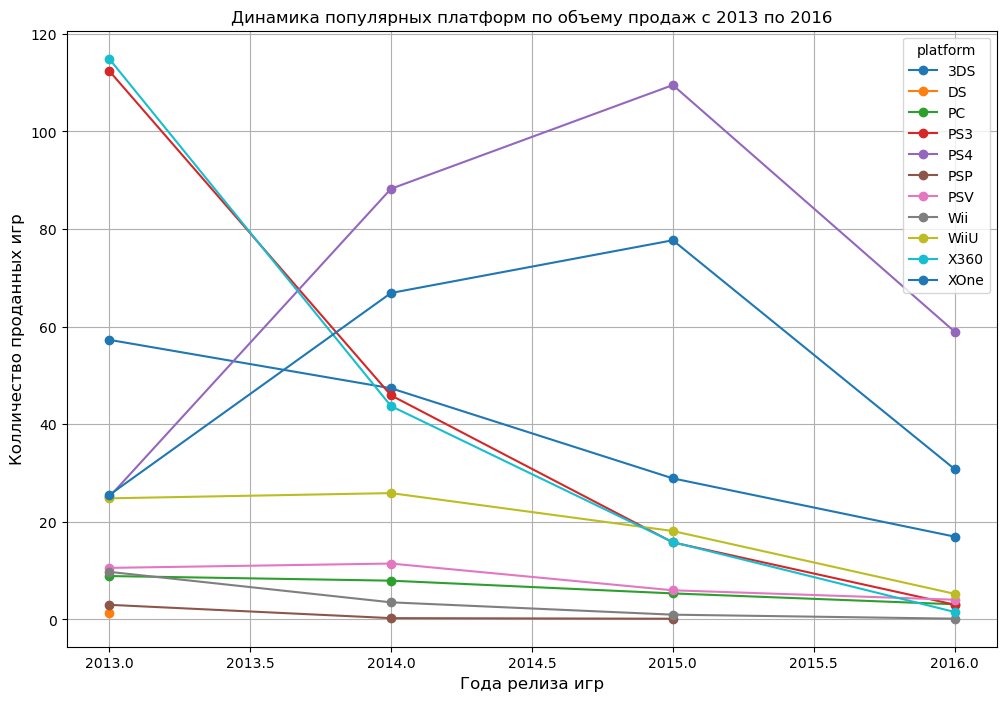

In [36]:
(
actual_data
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(grid=True, marker="o"
          ,figsize=(12, 8)
          ,title = 'Динамика популярных платформ по объему продаж с 2013 по 2016')
)
plt.xlabel('Года релиза игр',size=12)
plt.ylabel('Колличество проданных игр',size=12)

None

#### Вывод

Пложительные тендеции  в увеличении колличестава игр есть у ряда платформа:
- С 2013 года число игр содаваемых на PC медленно, но непрерывно растет
- PS4 показывает значительный уровень прироста от года к году с момента начала продажи на данную платформу
- ХOne показывает неизменно положительную динамику с 2013
- Для остальных платформ характерно снижение уровня продаж к 2016 году, или полной их прекращение

Общий объем продаж игр снизился к 2016, следовательно и продажи платформ тоже снилились, при этом:
- Высокую долю колличеста продаж сохраняют за собой PS4, DS, X360


### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

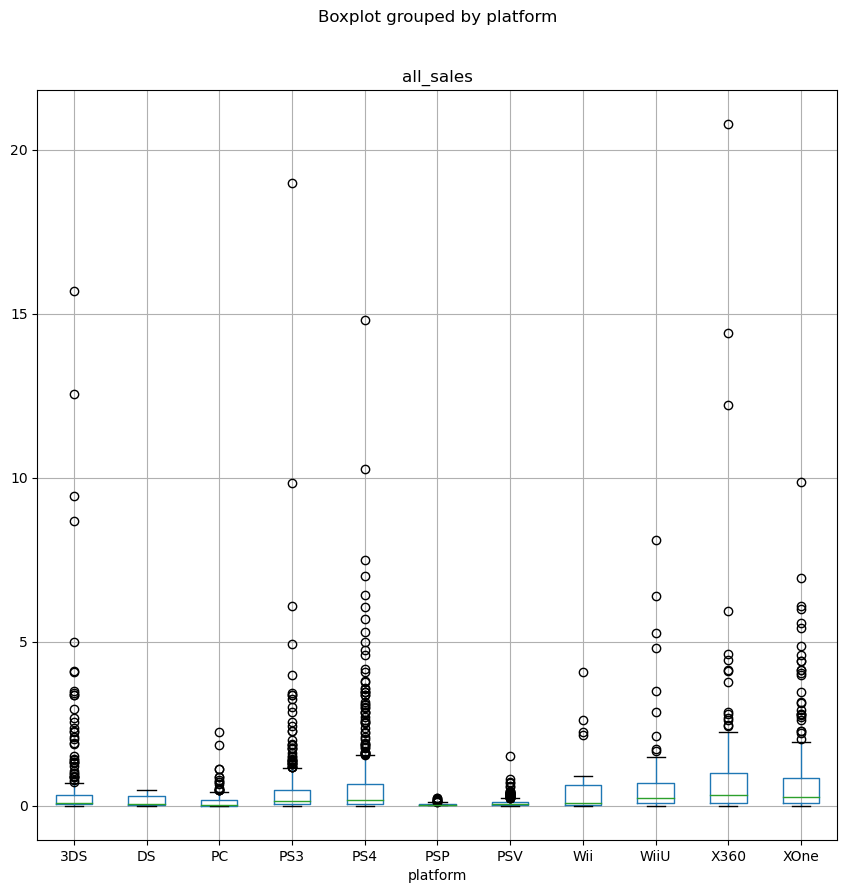

In [37]:
actual_data.boxplot('all_sales', by = 'platform',figsize=(10, 10))


(-1.0, 3.0)

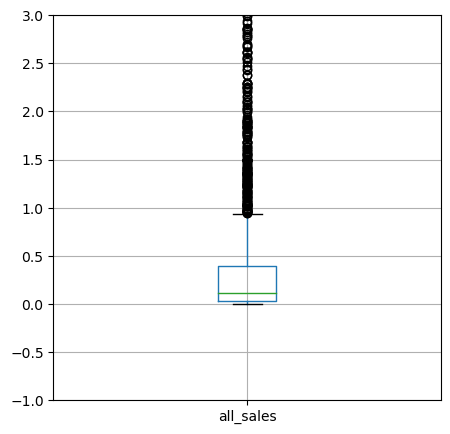

In [38]:
#"Ящик с усами" по глобальным продажам за актуальный период по всем платформам
actual_data.boxplot('all_sales', figsize=(5,5))

plt.ylim(-1,3)

In [39]:
actual_data['all_sales'].describe()

count    2233.000000
mean        0.508809
std         1.315183
min         0.000000
25%         0.030000
50%         0.110000
75%         0.390000
max        20.790000
Name: all_sales, dtype: float64

In [40]:
"""
top_platform = actual_data['platform'].value_counts().sort_values(ascending=False).head(10)

ax= (actual_data
    .query('platform in @top_platform.index')
    .boxplot('all_sales', by = 'platform',figsize=(10, 10))
)
ax.set_ylim(0, 3)
"""

"\ntop_platform = actual_data['platform'].value_counts().sort_values(ascending=False).head(10)\n\nax= (actual_data\n    .query('platform in @top_platform.index')\n    .boxplot('all_sales', by = 'platform',figsize=(10, 10))\n)\nax.set_ylim(0, 3)\n"

#### Вывод

 Анали Диаграммы "ящик с усами" по всем платформам в частности :
 
 
 Анализ общей Диаграммы "ящик с усами" показывает распределение колличества продаж по квартилям, выделяя их выбросы. Анализируя полученный "ящик с усами", видим, что значание нижнего уса зафиксировалось на отметке в 0 и в целом основая доля распредления значений колличества продажи игр находится в промежутке до 0.7 милн. копий (700 000 едениц). 

При этом на графике заметны и выбросы высше верхней граници. В рамках рынка игр это нормальное явление, рынок динамичный, быстро меняется.


### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [41]:
# определеним топ платформу для оценки влияния на уровень продаж оценок пользователей и критиков
platforms_by_2013 = actual_data.pivot_table(index = 'platform',values = 'all_sales',aggfunc = 'sum').sort_values(by = 'all_sales',ascending=False).head()

print(platforms_by_2013)

          all_sales
platform           
PS4          281.79
XOne         200.85
PS3          177.12
X360         175.94
3DS          150.49


In [42]:
# создадим сводную таблицу с необходимыми данными
PS4_data = actual_data.query('platform == "PS4"')
PS4_data = PS4_data[['year_of_release','critic_score', 'user_score', 'all_sales']]
PS4_data.head()

,year_of_release,critic_score,user_score,all_sales
31,2015,NaN,NaN,14.80
42,2014,97.0,8.3,10.27
77,2015,82.0,4.3,3.58
87,2015,NaN,NaN,7.48
92,2014,83.0,5.7,6.99


In [43]:
corr_PS4 = PS4_data[['critic_score','user_score','all_sales']].corr()
display(corr_PS4)

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.423487
user_score,0.557654,1.000000,-0.015023
all_sales,0.423487,-0.015023,1.000000


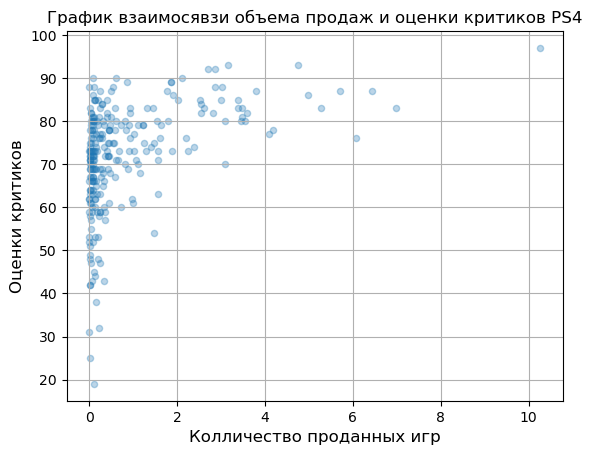

In [44]:
PS4_data.plot(x='all_sales', y='critic_score',title='График взаимосявзи объема продаж и оценки критиков PS4',
        kind='scatter',
        grid=True,
         alpha=0.3)

plt.xlabel('Колличество проданных игр',size=12)
plt.ylabel('Оценки критиков',size=12)
None

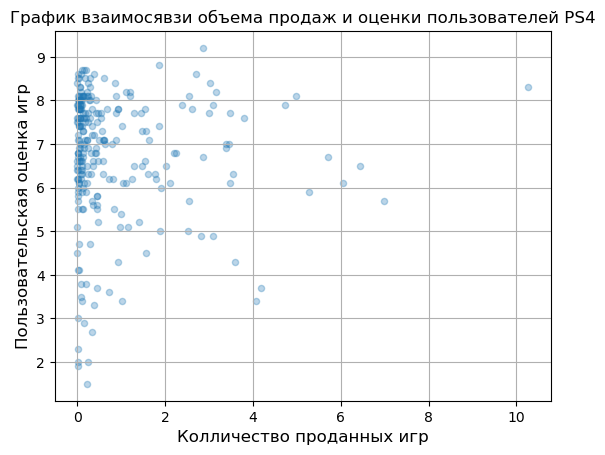

In [45]:
PS4_data.plot(x='all_sales', y='user_score',title='График взаимосявзи объема продаж и оценки пользователей PS4',
        kind='scatter',
        grid=True,
         alpha=0.3)
plt.xlabel('Колличество проданных игр',size=12)
plt.ylabel('Пользовательская оценка игр',size=12)
None

#### Вывов

Показатели корреляции колличества продаж относительно потребильеского рейтинга и оценки критиков:

|              | all_sales |
|--------------|-----------|
| critic_score | 0.423487  |
| user_score   |-0.015023  |

Такие значение показателя свидетельствуюот об отсудствии зависимости между параметрами,
что собственно можна наблюдать и на графиках.
Но чтобы использоваться выводы этого плока в дальнейших иссловадниях, проверим показатель корреляци по остальным платформам из топ 5 в блоке 3.8


### Соотнесем выводы с продажами игр на других платформах.

Полученные в блоке 3.7 резутаты необходимо сопоставить со значеними других топ 5 платформ, чтобы убедиться, что такие значения уровня корреляции не являются характерной особенноститью определенной платформы, а как минимум свойственна всем ее лидерам или же убедиться в обратном

In [46]:


plat = ['PS3','XOne','3DS','X360']

for x in plat:
    print ('Расчет зависимости колличества продаж от рейтингов:',x)
    display(actual_data.query('platform == @x')[['critic_score', 'user_score', 'all_sales']].corr()),
    
    print ('-' *60)
 

    


Расчет зависимости колличества продаж от рейтингов: PS3


,critic_score,user_score,all_sales
critic_score,1.000000,0.599920,0.342401
user_score,0.599920,1.000000,0.008684
all_sales,0.342401,0.008684,1.000000


------------------------------------------------------------
Расчет зависимости колличества продаж от рейтингов: XOne


,critic_score,user_score,all_sales
critic_score,1.000000,0.472462,0.390864
user_score,0.472462,1.000000,-0.068998
all_sales,0.390864,-0.068998,1.000000


------------------------------------------------------------
Расчет зависимости колличества продаж от рейтингов: 3DS


,critic_score,user_score,all_sales
critic_score,1.000000,0.769536,0.384688
user_score,0.769536,1.000000,0.274874
all_sales,0.384688,0.274874,1.000000


------------------------------------------------------------
Расчет зависимости колличества продаж от рейтингов: X360


,critic_score,user_score,all_sales
critic_score,1.000000,0.520946,0.343742
user_score,0.520946,1.000000,-0.012291
all_sales,0.343742,-0.012291,1.000000


------------------------------------------------------------


Диаграмма рассеивания колличества продаж относительно оценки критиков PS3
Диаграмма рассеивания колличества продаж относительно оценки критиков XOne
Диаграмма рассеивания колличества продаж относительно оценки критиков 3DS
Диаграмма рассеивания колличества продаж относительно оценки критиков X360


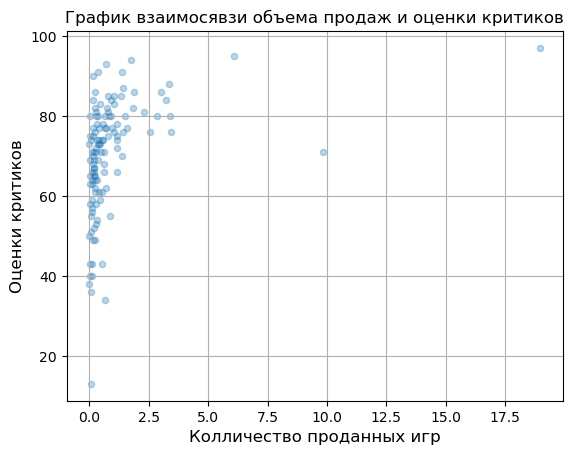

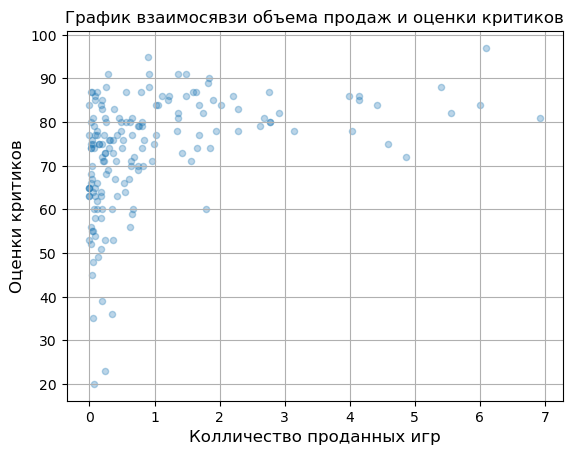

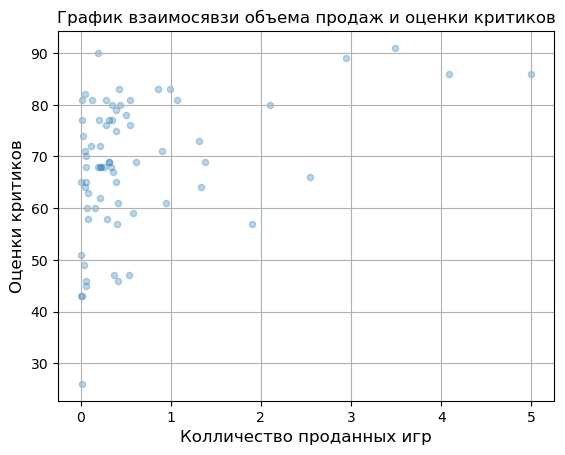

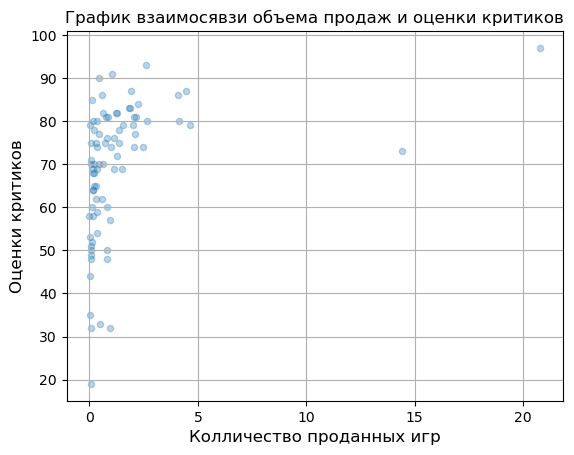

In [47]:
for x in plat:
    print ('Диаграмма рассеивания колличества продаж относительно оценки критиков', x)
    (actual_data
     .query('platform == @x')
     .plot(x='all_sales', y='critic_score',title='График взаимосявзи объема продаж и оценки критиков',
           kind='scatter',grid=True,alpha=0.3))
    plt.xlabel('Колличество проданных игр',size=12)
    plt.ylabel('Оценки критиков',size=12)
    None
   

Диаграмма рассеивания колличества продаж относительно рейтина потребителей PS3


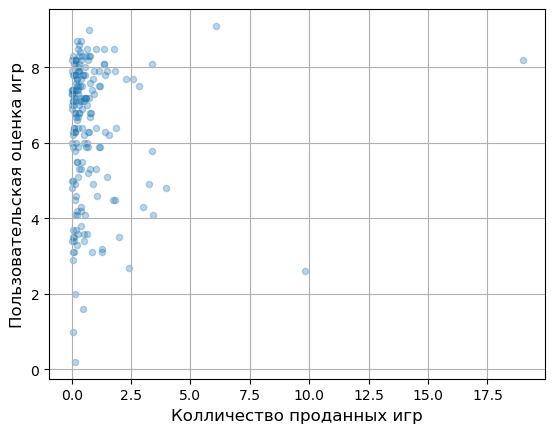

Диаграмма рассеивания колличества продаж относительно рейтина потребителей XOne


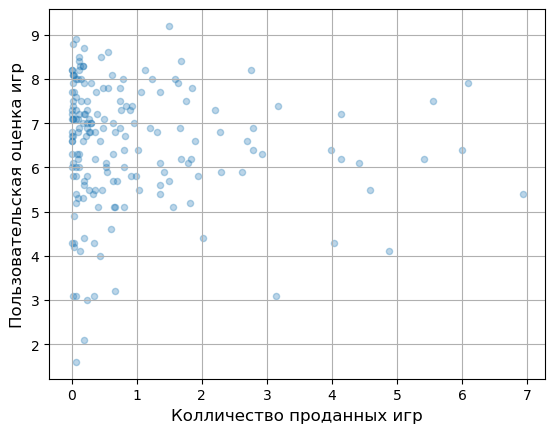

Диаграмма рассеивания колличества продаж относительно рейтина потребителей 3DS


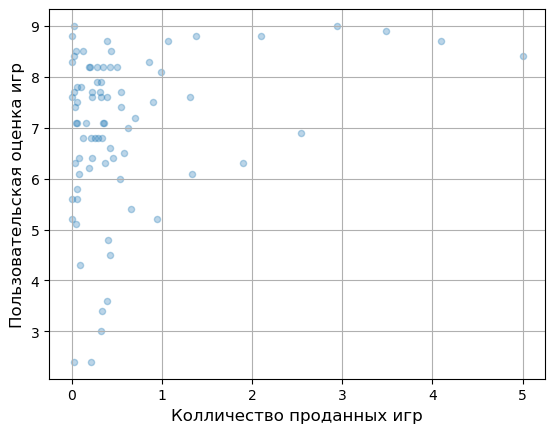

Диаграмма рассеивания колличества продаж относительно рейтина потребителей X360


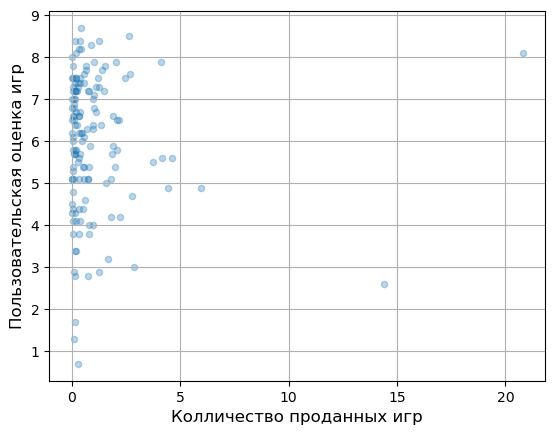

In [48]:
for x in plat:
    print ('Диаграмма рассеивания колличества продаж относительно рейтина потребителей', x)
    actual_data.query('platform == @x').plot(x='all_sales',y='user_score',
                                  kind='scatter',grid=True,alpha=0.3)
    plt.xlabel('Колличество проданных игр',size=12)
    plt.ylabel('Пользовательская оценка игр',size=12)
    plt.show()
    None
    
    

#### Вывод

Проанализированные данные зависимости топ 5 платформ от оценок критиков и других играков, не влияют на уровень продаж игр на топ 5 платформах.

Приведнный в данном разделе расчет корреляции предусматривает оценку зависимости ( -1 <= x <= 1).
И не по одному из факторов ( потребильский рейтин, рейтинг критиков) ни по одной из топ 5 платформ не превысил значени 0.4, что является недостаточным для обозначения зависимости показателей

### Посмотрим на общее распределение игр по жанрам

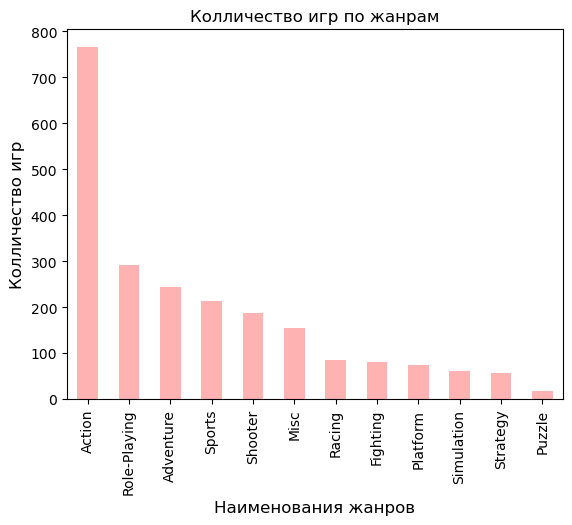

In [49]:
actual_data['genre'].value_counts()
actual_data['genre'].value_counts().plot(kind= 'bar',title = 'Колличество игр по жанрам',color= 'r',alpha=0.3)
plt.xlabel('Наименования жанров',size=12)
plt.ylabel('Колличество игр',size=12)

None

In [50]:
actual_data.pivot_table(index = 'year_of_release',columns = 'genre',values = 'all_sales',aggfunc = 'sum')


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2013,132.58,5.83,8.35,30.53,27.11,0.66,10.53,48.58,70.42,7.24,45.52,5.99
2014,96.22,5.55,19.77,24.25,8.22,1.69,14.97,48.31,70.81,3.29,47.06,0.92
2015,72.27,7.70,9.22,12.79,6.73,0.65,5.41,38.64,75.07,4.39,43.80,1.45
2016,28.72,3.45,4.97,2.70,3.13,0.00,1.75,19.79,38.56,0.78,19.02,0.78


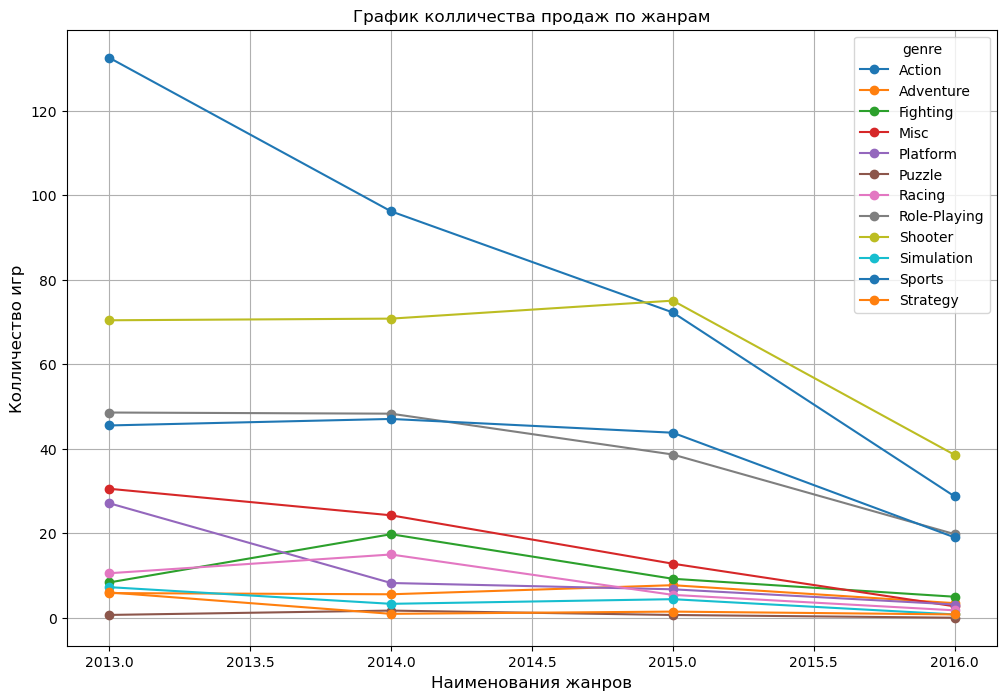

In [51]:
(
actual_data
    .pivot_table(index = 'year_of_release',columns = 'genre',values = 'all_sales',aggfunc = 'sum')
    .plot.line(grid=True, marker="o",figsize=(12, 8), title = 'График колличества продаж по жанрам')
)
plt.xlabel('Наименования жанров',size=12)
plt.ylabel('Колличество игр',size=12)
None

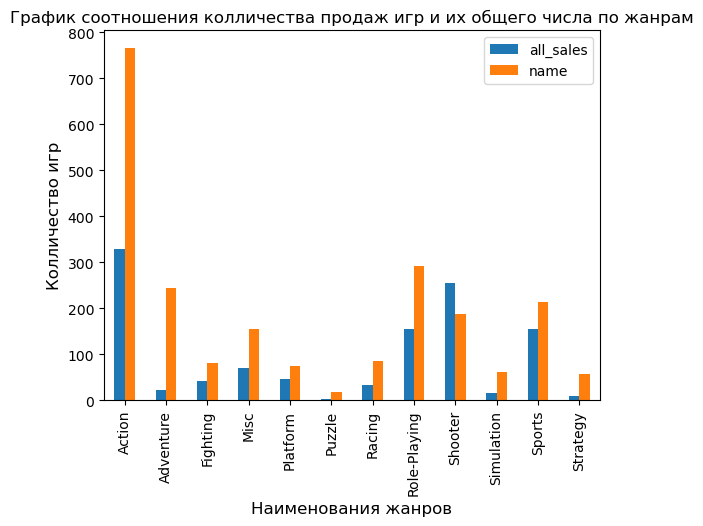

In [52]:

actual_data.groupby(by='genre').agg({'all_sales':'sum', 'name':'count'}).plot(kind = 'bar',
                                                                              title= 'График соотношения колличества продаж игр и их общего числа по жанрам' )
plt.xlabel('Наименования жанров',size=12)
plt.ylabel('Колличество игр',size=12)
None


(-0.5, 5.0)

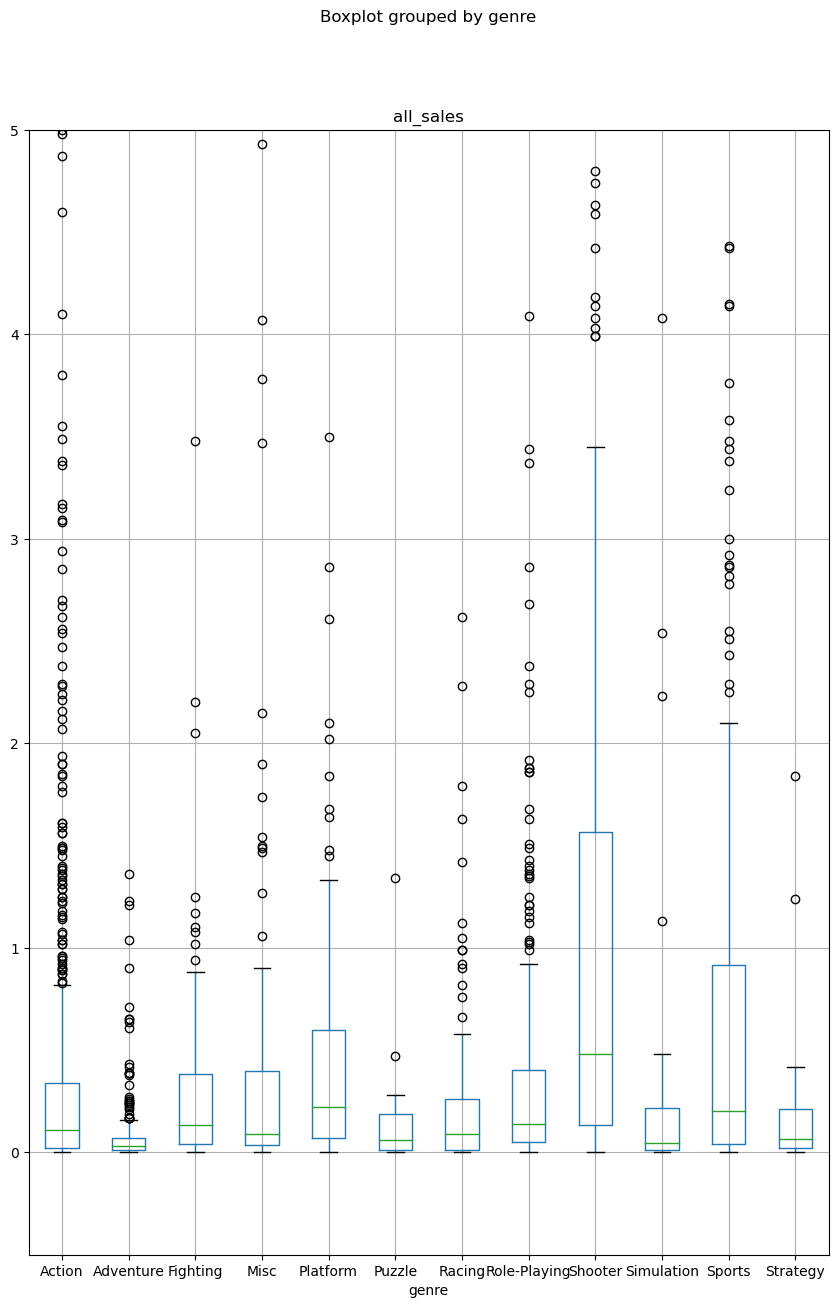

In [53]:
actual_data.boxplot('all_sales', by = 'genre',figsize=(10, 15))
plt.ylim(-0.5,5)

#### Вывод

Рассматривая общее распредление колличества продаж игр по различным жанрам выделим лидеров.
Лидером среди жандров с большим отрывом стал Action, за на приблезительно одном уровне закрепились: Misc, Sports,Role-Playing

Для того,чтобы найти стабильный жанр и избежать влияние выбросов на результаты анализа построим диаграммы размаха по жанрам.
По Диаграмме размаха, устойчивыми с высоким медианным значением можно назвать: Misc ,Role-Playing, shooter. 
В shooter большой разброс значений, большой "ящик" и длинные "усы", но меиданное значение высокое, жанр однозначно заслуживает внимания, как высокопотенциальный



В рамках данного блока приведн график динамики колиечства продаж по разделам, и тут мы можем наблюда значительно возросшую на общем фоне долю shooter-ов

Также приведен график соотношения общего числа продаж и колличество выпущенных игр в разрезе жанров.
Собственно график наглядно показывает почему игры жанра Action имею большее число продаж, дело в том, что в данном жанре представленно много игр, попкупателям есть из чего выбрать.

### Вывод Глава 3

В  рамках работы в 3 главе :

- Была изучена и описана динамика выпуска игр по годам. Спад количества игр с 2010 года связан с изменением структуры рынка, большей избирательнуюсть покупателей. Игровых проектов стало меньше, но они начали наращивать свой масштаб.

- Определены наиболее популярные платформы по уровню продаж. Выявлено, что средний период "жизни" платформы составляет 7 лет.

- Был изменен период рассматрения данных для прогнозирования на 2017 год и дальнейшего анализа. Взят период с 2013 по 2016 год

- Были определены потенциально прибыльные планформы:
        - С 2013 года число игр содаваемых на PC медленно, но непрерывно растет
        - PS4 показывает значительный уровень прироста от года к году с момента начала продажи на данную платформу
        - ХOne показывает неизменно положительную динамику с 2013
        - Для остальных платформ характерно снижение уровня продаж к 2016 году, или полной их прекращение
        
- Проверена зависимость уроня продаж онсительно рейтинга критиков и оценок пользователей по топ-5 платформам рынка.Не по одному из факторов ( потребильский рейтин, рейтинг критиков) ни по одной из топ 5 платформ уровень корреляции не превысил значени 0.4, что является недостаточным для обозначения зависимости показателей

- Раскрыто распределение уровня игр по жанрам.Лидеры Misc ,Role-Playing, shooter,Platform. Жанром с высоким потенциалом оказался shooter

## Шаг 4.Составим портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)

На европейском и американском уровне топ-5 совпадает (одни и теже 5 компаний, но  в разном порядке).
Сначала построю для этих 2 рынков круговые диаграммы, а потом для азиатского отдельно

#### Европейский и Американские рынки

In [54]:
(
actual_data
    .pivot_table(index = ['platform'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'eu_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
PS3,67.81,23.35,63.50
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
3DS,30.96,67.81,38.20


In [55]:
p = ['3DS','X360','XOne','PS3','PS4']
def new_column(i):
    if i in p:
        return i
    else: 
        return 'other'

In [56]:
actual_data['platform_new'] = actual_data['platform'].apply(new_column)

C:\Users\tumur\AppData\Local\Temp\ipykernel_21232\1783026145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['platform_new'] = actual_data['platform'].apply(new_column)


Юпитер выдает предупреждение о копировании данных датасета, но как показывает тест ниже, данная часть кода работает корректно.

In [57]:
# Проверка сумм продаж по топ приставкам. Данные совпадают с данными в аналогичной сводной таблице.
# Значит не смотря на предупреждение, код спаботал верно
(
actual_data
    .pivot_table(index = ['platform_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'eu_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
platform_new,,,
PS4,141.09,15.96,108.74
PS3,67.81,23.35,63.50
other,58.26,32.81,52.49
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66


In [58]:

"""(
actual_data
    .pivot_table(index = ['platform'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .head(5)
    .plot(kind = 'bar',alpha=0.6)
)
"""

"(\nactual_data\n    .pivot_table(index = ['platform'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')\n    .head(5)\n    .plot(kind = 'bar',alpha=0.6)\n)\n"

In [59]:
platform_val = actual_data.pivot_table(index = ['platform_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')



<AxesSubplot:title={'center':'Распределение колличества продаж по платформам в Американском регионе'}, ylabel='na_sales'>

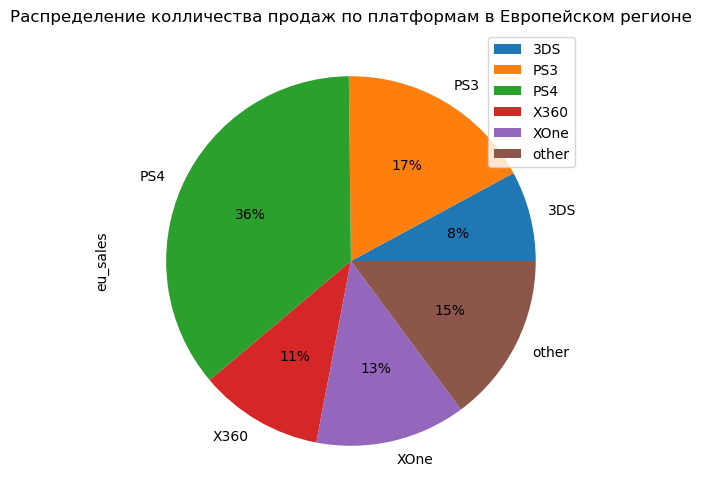

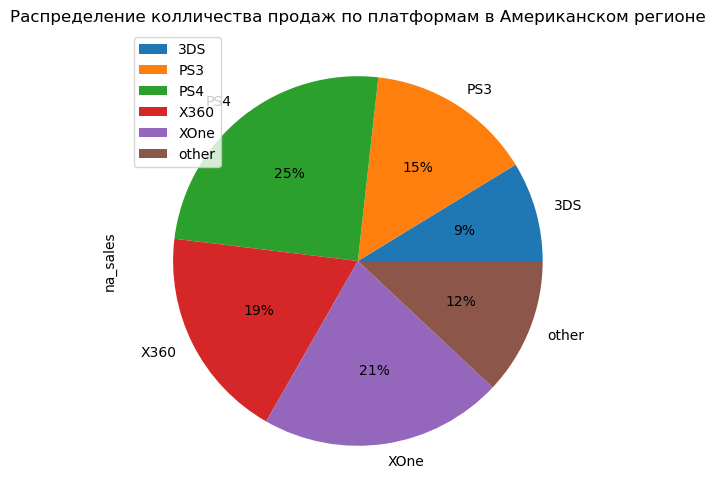

In [60]:

platform_val.plot( y = 'eu_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по платформам в Европейском регионе')
platform_val.plot( y = 'na_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по платформам в Американском регионе')

#### Азиатский рынок

In [61]:
(
actual_data
    .pivot_table(index = ['platform'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'jp_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
PS3,67.81,23.35,63.50
PSV,6.10,18.59,5.04
PS4,141.09,15.96,108.74
WiiU,19.85,10.88,29.21


In [62]:
p = ['3DS','PSV','WiiU','PS3','PS4']
def new_column(i):
    if i in p:
        return i
    else: 
        return 'other'

In [63]:
actual_data['platform_new'] = actual_data['platform'].apply(new_column)

C:\Users\tumur\AppData\Local\Temp\ipykernel_21232\1783026145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['platform_new'] = actual_data['platform'].apply(new_column)


Юпитер выдает предупреждение о копировании данных датасета, но как показывает тест ниже, данная часть кода работает корректно.

In [64]:
# Проверка сумм продаж по топ приставкам. Данные совпадают с данными в аналогичной сводной таблице.
# Значит не смотря на предупреждение, код спаботал верно
(
actual_data
    .pivot_table(index = ['platform_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'jp_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
platform_new,,,
3DS,30.96,67.81,38.20
PS3,67.81,23.35,63.50
PSV,6.10,18.59,5.04
PS4,141.09,15.96,108.74
WiiU,19.85,10.88,29.21


In [65]:
platform_val = actual_data.pivot_table(index = ['platform_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')


<AxesSubplot:title={'center':'Распределение колличества продаж по платформам в Азиатском регионе'}, ylabel='eu_sales'>

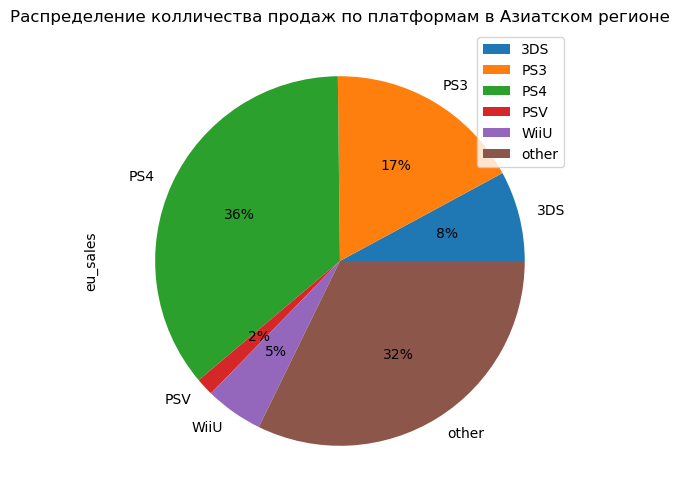

In [66]:

platform_val.plot( y = 'eu_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по платформам в Азиатском регионе')


#### Вывод

- Азиатский рынок: Первенство среди платформ на азиатском рынке сохраняется за PS4, так же выделяется PS3. Доля категории other составляет 32%
- Америкнаский рынок: Лидерство удерживают 2 платформы XOne и PS4, так же высокая доля у X360 и PS3, учитывая, что это пратформы 2 компаний, можно сказать, что борьба за рынок у них весьма равная. Доля категории other 12%.
- Европейский рынок: Лидерство на данном рынке за PS4 - 36%, в 2 раза меньшая доля у PS3, X360,XOne.Доля категории Other 15%


### Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5)

#### Ключевые жанры на Американском и Европейском рынках

In [67]:
(
actual_data
    .pivot_table(index = ['genre'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'eu_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27
Role-Playing,36.97,51.04,46.40
Racing,20.19,2.30,12.96


In [68]:
x = ['Action','Shooter','Sports','Pole-Playing','Racing']

def new_column(i):
    if i in x:
        return i
    else: 
        return 'other'

In [69]:
actual_data['genre_new'] = actual_data['genre'].apply(new_column)

C:\Users\tumur\AppData\Local\Temp\ipykernel_21232\1970660937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['genre_new'] = actual_data['genre'].apply(new_column)


Юпитер выдает предупреждение о копировании данных датасета, но как показывает тест ниже, данная часть кода работает корректно.

In [70]:
# Проверка сумм продаж по топ направлениям жанров. Данные совпадают с данными в аналогичной сводной таблице.
# Значит не смотря на предупреждение, код спаботал верно
(
actual_data
    .pivot_table(index = ['genre_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'eu_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
genre_new,,,
Action,118.13,40.49,126.05
other,105.53,85.97,123.69
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27
Racing,20.19,2.30,12.96


In [71]:
genre_val =(actual_data.pivot_table(index = ['genre_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum'))


<AxesSubplot:title={'center':'Распределение колличества продаж по жанрам в Американском регионе'}, ylabel='na_sales'>

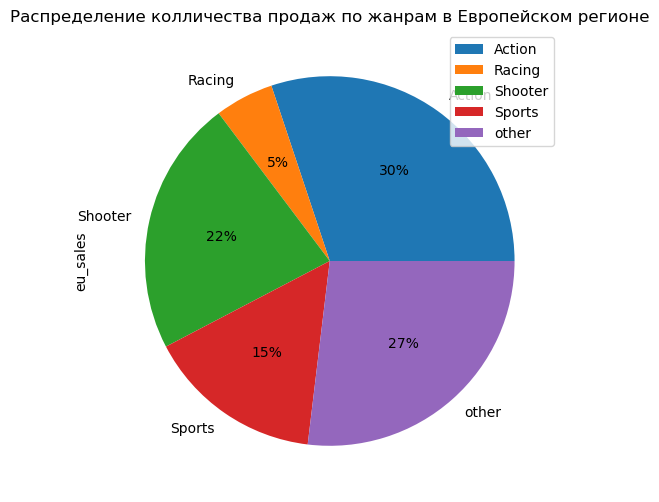

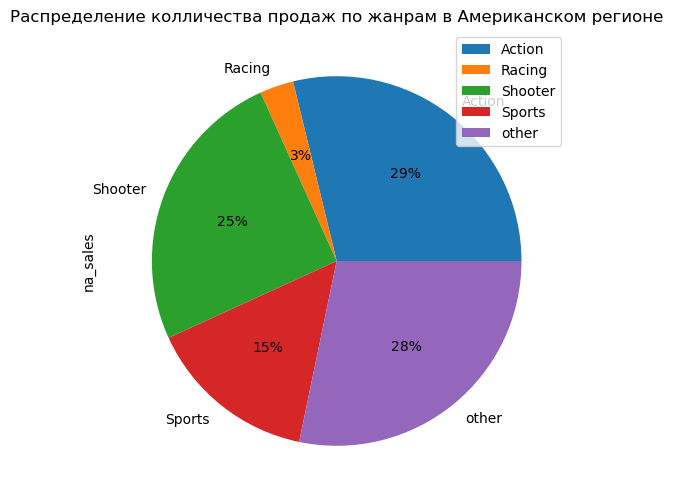

In [72]:
genre_val.plot( y = 'eu_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по жанрам в Европейском регионе')
genre_val.plot( y = 'na_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по жанрам в Американском регионе')

#### Ключевые жанры на Азиатском рынке

In [73]:
(
actual_data
    .pivot_table(index = ['genre'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'jp_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
genre,,,
Role-Playing,36.97,51.04,46.40
Action,118.13,40.49,126.05
Misc,20.04,9.20,27.49
Fighting,8.55,7.65,15.55
Shooter,87.86,6.61,109.74


In [74]:
x = ['Action','Shooter','Fighting','Role-Playing','Misc']

def new_column(i):
    if i in x:
        return i
    else: 
        return 'other'

In [75]:
actual_data['genre_new'] = actual_data['genre'].apply(new_column)

C:\Users\tumur\AppData\Local\Temp\ipykernel_21232\1970660937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['genre_new'] = actual_data['genre'].apply(new_column)


Юпитер выдает предупреждение о копировании данных датасета, но как показывает тест ниже, данная часть кода работает корректно.

In [76]:
# Проверка сумм продаж по топ направлениям жанров. Данные совпадают с данными в аналогичной сводной таблице.
# Значит не смотря на предупреждение, код спаботал верно
(
actual_data
    .pivot_table(index = ['genre_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum')
    .sort_values(by = 'jp_sales',ascending=False).head(5)
)

,eu_sales,jp_sales,na_sales
genre_new,,,
Role-Playing,36.97,51.04,46.40
Action,118.13,40.49,126.05
other,120.68,25.79,112.48
Misc,20.04,9.20,27.49
Fighting,8.55,7.65,15.55


In [77]:
genre_val =(actual_data.pivot_table(index = ['genre_new'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc='sum'))


<AxesSubplot:title={'center':'Распределение колличества продаж по жанрам в Азиатском регионе регионе'}, ylabel='jp_sales'>

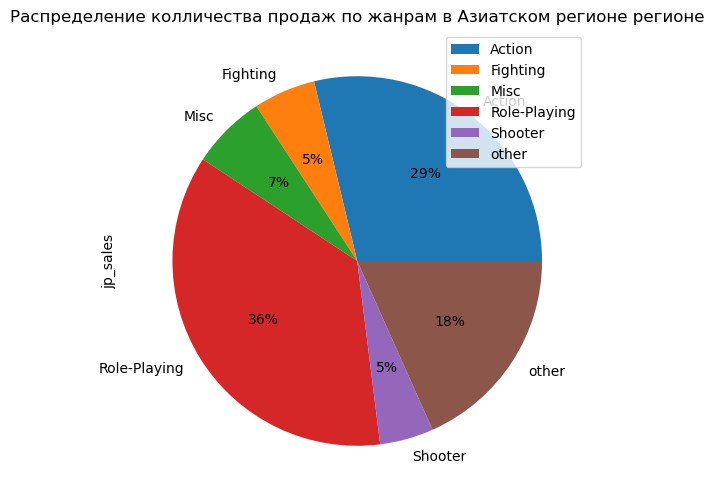

In [78]:
genre_val.plot( y = 'jp_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по жанрам в Азиатском регионе регионе')


C:\Users\tumur\AppData\Local\Temp\ipykernel_21232\1948798769.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\tumur\AppData\Local\Temp\ipykernel_21232\1948798769.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\tumur\AppData\Local\Temp\ipykernel_21232\1948798769.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].su

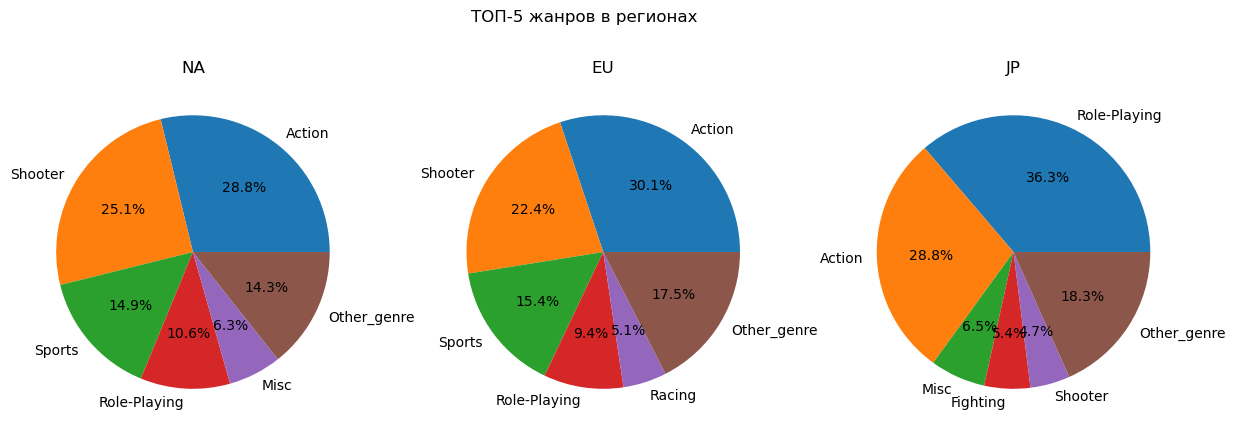

In [79]:
# Комментарий ревьюера 2
games_fresh = actual_data.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

#### Вывод

Американский рынок: Лидерство на этом рынке у жанра Action - 29%, Shooter - 25% , other - 28%.

Европейский рынок : Лидерство на этом рынке у жанра Action - 30%, Shooter - 22% , other - 27%.

Азиатский рынок : Лидирующую позицию занял жанр Role_playing -36%, Action - 29%, other-18%. У остальных жанров доля на этом рынке весьма незначительная.

Если ориентироваться на все три рынка, то лучшим вариантом жанра являтся Action, так как у него высокие доли во всех 3 рынках.

### Влияние рейтинг ESRB на продажи в отдельном регионе (NA, EU, JP)

Добавим расшифровку категорий рейтинга ESRB, что при дальнейшем анализе понимать как влияет конкретная группа с определнынми возрастными ограничениями

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. 
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [80]:
rating_val = actual_data.pivot_table(index = ['rating'], values = ['jp_sales', 'eu_sales', 'na_sales'], aggfunc={'sum'})
display (rating_val )

,eu_sales,jp_sales,na_sales
,sum,sum,sum
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
NC,78.91,85.05,89.42
T,41.95,20.59,49.79


<AxesSubplot:title={'center':'Распределение колличества продаж по рейтингу ESRB в Американском регионе'}, ylabel='sum'>

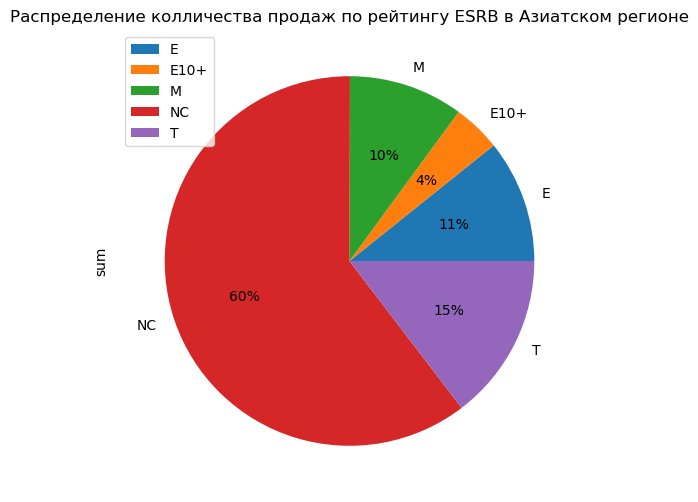

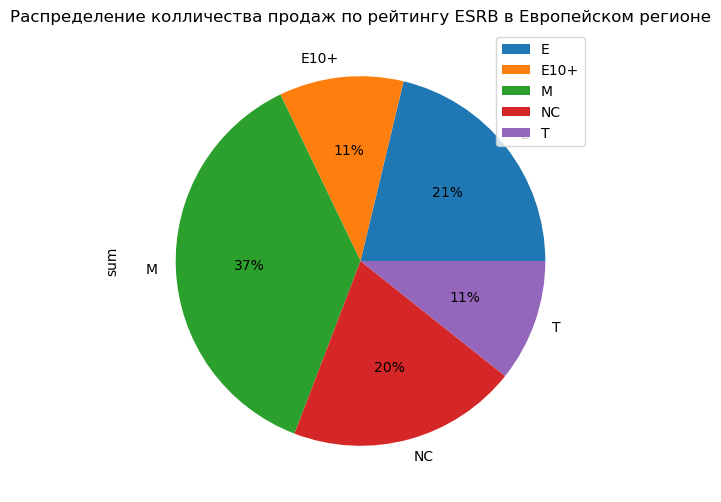

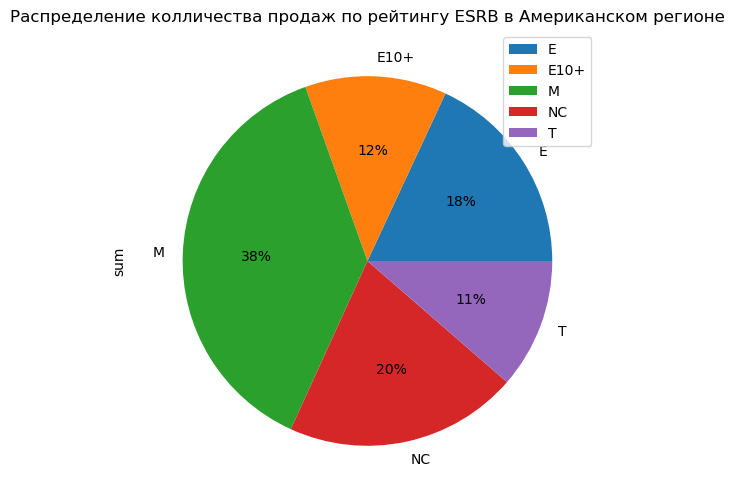

In [81]:
rating_val.plot( y = 'jp_sales' ,
                kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
                title='Распределение колличества продаж по рейтингу ESRB в Азиатском регионе')
rating_val.plot( y = 'eu_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по рейтингу ESRB в Европейском регионе')
rating_val.plot( y = 'na_sales' , kind = 'pie',autopct='%1.0f%%',figsize=(6,6),
               title='Распределение колличества продаж по рейтингу ESRB в Американском регионе')

#### Вывов

NC - парметр, которым мы заполнили пропущенные значения. чтобы не терять данные и проанализить большую совокупность.

Распределение колличества продаж по рейтингу ESRB практически идентично на Американском и Европеском рынках:

Большая доля категории M - 38 %, E-18% и 21% соотвественно.
На Азиатском рынке оказалась очень существенно большой категория NC, порядка 60% от всех игр.
Такое распределение может быть особенностью рынка или правоой системы в регионе. По жанру в Азиатском регионе много Role-Playing игр, возможно значительная доля таких игр разрабатываются под азиатский сегмент и не проходит систему ESRB

In [82]:
# Комментарий ревьюера
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


NC      977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

### Вывод Глава 4

В рамках работы в данной главе были рассмотрены особенности распределения  продаж игр в рамках региональных рынков:

>Анали популярности платформ по регионам, позврояет утвердать:   
- Азиатский рынок: Первенство среди платформ на азиатском рынке сохраняется за PS4, так же выделяется PS3. Доля категории other составляет 32%
- Америкнаский рынок: Лидерство удерживают 2 платформы XOne и PS4, так же высокая доля у X360 и PS3, учитывая, что это пратформы 2 компаний, можно сказать, что борьба за рынок у них весьма равная. Доля категории other 12%.
- Европейский рынок: Лидерство на данном рынке за PS4 - 36%, в 2 раза меньшая доля у PS3, X360,XOne.Доля категории Other 15%


>Анализ раздела рынков по жанрам, показывает:

- Американский рынок: Лидерство на этом рынке у жанра Action - 29%, Shooter - 25% , other - 28%.
- Европейский рынок : Лидерство на этом рынке у жанра Action - 30%, Shooter - 22% , other - 27%.
- Азиатский рынок : Лидирующую позицию занял жанр Role_playing -36%, Action - 29%, other-18%. У остальных жанров доля на этом рынке весьма незначительная.

Если ориентироваться на все три рынка, то лучшим вариантом жанра являтся Action, так как у него высокие доли во всех 3 рынках.


> Анализ продаж по рейтингу ESRB:

- NC - парметр, которым мы заполнили пропущенные значения. чтобы не терять данные и проанализить большую совокупность.
- Распределение колличества продаж по рейтингу ESRB практически идентично на Американском и Европеском рынках:
- Большая доля категории M - 38 %, E-18% и 21% соотвественно.На Азиатском рынке оказалась очень существенно большой категория NC, порядка 60% от всех игр.Такое распределение может быть особенностью рынка или правоой системы в регионе. По жанру в Азиатском регионе много Role-Playing игр, возможно значительная доля таких игр разрабатываются под азиатский сегмент и не проходит систему ESRB

## Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [83]:
# Проверим наличие пустых строк и удлам их, чтобы избежать ошибок в дальнейшем
actual_data['user_score'].isna().sum()

actual_data = actual_data.dropna(subset = ['user_score'])

Сформируем гипотезы :
- Н0 - cредние пользовательские рейтинги платформ Xbox One и PC равны
- Н1 - cредние пользовательские рейтинги платформ Xbox One и PC не равны

In [84]:
# проверим гипотезу
results = st.ttest_ind(
    actual_data.query('platform == "XOne"')['user_score'],
    actual_data.query('platform == "PC"')['user_score'],
    equal_var = False)

alpha = 0.05
print ('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print ('отвергаем нулевую гипотезу')
else:
    print ('не получилось отвергуть нулевую гипотезу')

p-значение: 0.14759594013430463
не получилось отвергуть нулевую гипотезу


In [85]:
# Выведем средний уровенить пользовательского рейтинга платформ, чтобы проверить подтверждение гипотезы

print ('Средний рейтинг пользователей платформы Xbox:',actual_data.query('platform == "XOne"')['user_score'].mean())
print ('Средний рейтинг пользователей платформы   PC:',actual_data.query('platform == "PC"')['user_score'].mean())

Средний рейтинг пользователей платформы Xbox: 6.52142857142857
Средний рейтинг пользователей платформы   PC: 6.269677419354836


### Гипотеза 2. Cредние пользовательские рейтинги жанров Action и Sports равны.

Cформулируем нулевую и альтернативную гипотезы:

- H0 - Средние пользовательские рейтинги жанров Action и Sports не равны

- H1 - Средние пользовательские рейтинги жанров Action и Sports равны

Версия 2

Cформулируем нулевую и альтернативную гипотезы:

H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») РАВНЫ.

H1 -Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)   НЕ РАВНЫ.

In [86]:
# Вывызаем метод проверки гипотезы

results = st.ttest_ind(
    actual_data.query('genre == "Action"')['user_score'],
    actual_data.query('genre == "Sports"')['user_score'],
    equal_var = False)

# Задаем значение уровня значимости
alpha = 0.05
print ('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print ('отвергаем нулевую гипотезу')
else:
    print ('не получилось отвергуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
отвергаем нулевую гипотезу


In [87]:
# Рассматрим средние рейтинги, что проверить обоснованность отвержения гипотезы

print ('Средний рейтинг пользователей жанра Action:',actual_data.query('genre == "Action"')['user_score'].mean())
print ('Средний рейтинг пользователей жанра Sports:',actual_data.query('genre == "Sports"')['user_score'].mean())

Средний рейтинг пользователей жанра Action: 6.837532133676097
Средний рейтинг пользователей жанра Sports: 5.238124999999999


### Вывод Глава 5

Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты.


Значение уровня занчитмости на 5% - общепринятое пороговое значение( также как и 1%). Окончательное решение, какой порог считать достаточным, всегда остаётся за аналитиком

Гипотезы формировали на основе запроса указанного в ТЗ.

Для тестирования гипотез использован двусторонний t-тест Стьюдента.Критерий Стьюдента применяется, если нужно сравнить только две группы количественных признаков с нормальным распределением.

1. Гипотеза 1 не получилось отвергнуть,  распределние среднего пользовательского рейтинга платформ Xbox One и PC оказалось практически инденчиным.

2. Гипотеза 2 была отвергуната,Cредние пользовательские рейтинги жанров Action и Sports не равны. 

## Общий вывод проведенного исследования

Общий вывод V2

Проведенный в данном проекте анализ, должен послужить определению наиболее рентабельного и менее рискованного варианта реализации рекламного бюджета.

1. Регион.

 - Так как Европейские и Американский рынки во многом схоже, стоит рассматривать их как направление реализации. Так как они схоже и имеют большой объем по отдельности и естественно в совокупности.
 - Объемы Азиатского рынка меньше, и сам рынок по многим показателем является спецефическим
 

2. Платформа

 - Если стремиться охватить все рынки, то однозначно надо рассматривать платформу PS4, так как они имеет большую долю продаж игр во всех трех регионах, это актуальная, не устаревшая платформа к 2017 году (PS3- тоже популярен, но очевидно,что он уже устаревает)
 - Если ориентироваться на Евроейский и Американский рынки, то можно рассмотреть PS4 или Xone - две конкурируеющие платформы с равно большоей долей рынка в каждом из регионов
 
 
3. Жанр

 - Если ориентироваться на Европейский и Американский рынки (очень схожи по структуре). То следует рассматривать жанры : Action, Shooter.
 - в рамках Азиатского рынка стоит обратить внимание на: Role_playing, Action.
 
 4. Рейтинговая оценка ESRB

 - В зависимости от региона, стоит обратить внимание на категории M и E. Так как M имеет большую долю продаж на Американском и Европейском рынках. А E- категоряи без ограничей, ее доля выражена на любом рынка, не имеет рисков правового ограничения.

5. Оценки критиков и пользователей.

 - Проведенный анализ показал, что ориентироваться на оценки критиков и пользователей не стоит. они не влияют на уровень продаж игр.
 

